# **Machine Learning(Regression and Classification)**


In [45]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
#Importing Datasets
data_train = pd.read_csv('titanic\\train.csv')
data_test = pd.read_csv('titanic\\test.csv')

In [47]:
#data_train.head(10)
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Data Preprocessing

In [48]:
# For Training Data
# Handle missing values in the Age and Fares columns
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp1.fit(data_train[["Age"]])
data_train["Age"] = imp1.transform(data_train[["Age"]])

imp2 = SimpleImputer(missing_values = 0.0, strategy = 'mean')
imp2.fit(data_train[['Fare']])
data_train['Fare'] = imp2.transform(data_train[['Fare']])

# Using Encoder to handle categorical variables like Gender
from sklearn.preprocessing import LabelEncoder
label_encoder1= LabelEncoder()
data_train['Sex'] = label_encoder1.fit_transform(data_train['Sex'])

In [49]:
# For Test Data
# Handle missing values in the Age and Fares columns
imp3 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp3.fit(data_test[["Age"]])
data_test["Age"] = imp3.transform(data_test[["Age"]])

imp4 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp4.fit(data_test[['Fare']])
data_test['Fare'] = imp4.transform(data_test[['Fare']])

# Using Encoder to handle categorical variables like Gender
label_encoder2= LabelEncoder()
data_test['Sex'] = label_encoder2.fit_transform(data_test['Sex'])

In [50]:
# Creating training variables
X_train = data_train.iloc[:, [2,4,5,6,7]].values
Y_train = data_train.iloc[:,9].values

In [51]:
# Creating test variables
X_test = data_test.iloc[:, [1,3,4,5,6]].values
Y_test = data_test.iloc[:,8].values

## **Regression**: Titanic data is used to predict the fares of the passengers using Decision Tree Regression with features like *Age, Sex, Ticket Class, No.of of siblings / spouses aboard the Titanic, No.of of parents / children aboard the Titanic*

In [52]:
# Use Decision Tree Regression to train over the given data
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0)
reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [53]:
# Predict the Fares over test data
Y_pred = reg.predict(X_test)

In [54]:
# Performance Metrics
from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(Y_test, Y_pred)))

41.211698795430976


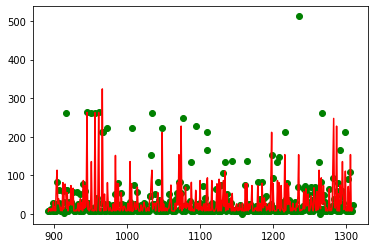

In [55]:
plt.scatter(data_test.iloc[:,0].values, Y_test, color = 'green')
plt.plot(data_test.iloc[:,0].values, Y_pred, color = 'red')

In [56]:
# Create training variables for classification
x_train = data_train.iloc[:,[2,4,5,6,7,9]].values
y_train = data_train.iloc[:,1].values

In [57]:
# Create test variables for classification
x_test = data_test.iloc[:,[1,3,4,5,6,8]]

In [58]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

## **Classification**: Used to predict if the passeneger survived or not based on features like *Age, Sex, Ticket Class, No.of of parents / children aboard the Titanic, Fare*

In [59]:
from sklearn.neighbors import KNeighborsClassifier
clsf = KNeighborsClassifier()
clsf.fit(x_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred = clsf.predict(x_test)

In [73]:
sur_count= 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        print(data_test.iloc[:,2].values[i])
        sur_count += 1
print("The number of survivors from test set are ",sur_count)
print("The number of deceased from test set are ",(len(y_pred)-sur_count))

Wirz, Mr. Albert
Abrahim, Mrs. Joseph (Sophie Halaut Easu)
Snyder, Mrs. John Pillsbury (Nelle Stevenson)
Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)
del Carlo, Mrs. Sebastiano (Argenia Genovesi)
Rothschild, Mr. Martin
Olsen, Master. Artur Karl
Flegenheim, Mrs. Alfred (Antoinette)
Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
Ostby, Miss. Helene Ragnhild
Mock, Mr. Philipp Edmund
Cacic, Miss. Manda
Hee, Mr. Ling
Corbett, Mrs. Walter H (Irene Colvin)
Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)
Bucknell, Mrs. William Robert (Emma Eliza Ward)
Smith, Mr. Lucien Philip
Hocking, Miss. Ellen Nellie""
Fortune, Miss. Ethel Flora
Chaudanson, Miss. Victorine
Bradley, Miss. Bridget Delia
Corey, Mrs. Percy C (Mary Phyllis Elizabeth Miller)
Burns, Miss. Mary Delia
Fortune, Mrs. Mark (Mary McDougald)
Nieminen, Miss. Manta Josefina
Geiger, Miss. Amalie
Cornell, Mrs. Robert Clifford (Malvina Helen Lamson)
Boulos, Master. Akar
Straus, Mr. Isidor
Case, Mr. Howard Brown
Barry, Miss. Julia